Case 1: Averages with Varying N and M

Distribution: uniform
Average λ = 10.95
M/M/1: Unstable
M/M/5: Unstable

Distribution: exponential
Average λ = 94.05
M/M/1: Unstable
M/M/5: Unstable

Case 2: Plots for Constant N, M, R


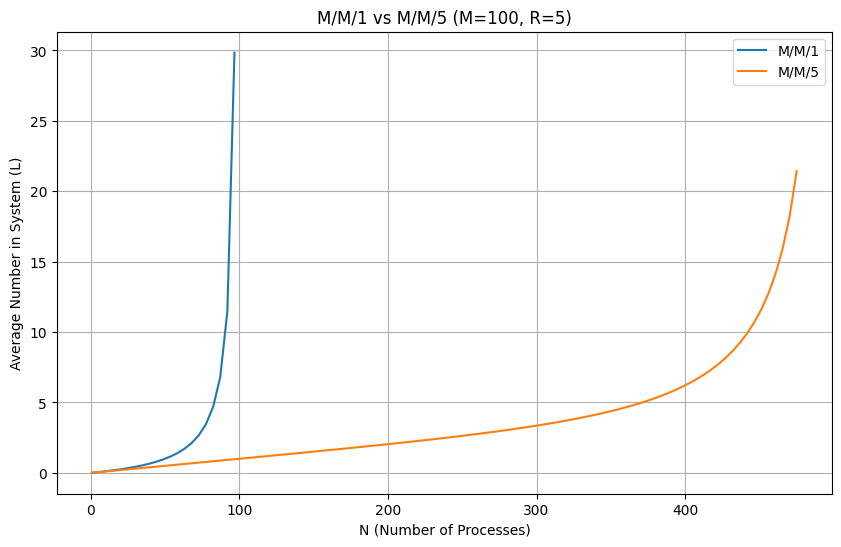

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# M/M/1 Metrics
def mm1_metrics(lmbda, mu=1):
    rho = lmbda / mu
    if rho >= 1:
        return None
    L = rho / (1 - rho)
    W = 1 / (mu - lmbda)
    Lq = rho**2 / (1 - rho)
    Wq = rho / (mu * (1 - rho))
    P0 = 1 - rho
    return L, W, Lq, Wq, P0

# M/M/S Metrics (S = R)
def mms_metrics(lmbda, mu=1, S=1):
    rho = lmbda / (S * mu)
    if rho >= 1:
        return None
    # Compute P0
    a = lmbda / mu
    sum_term = sum((a**n) / factorial(n) for n in range(S))
    queue_term = (a**S) / (factorial(S) * (1 - rho))
    P0 = 1 / (sum_term + queue_term)
    # Probability of queuing
    Pq = ((a**S) / factorial(S)) * P0 / (1 - rho)
    Lq = Pq * rho / (1 - rho)
    L = Lq + a
    Wq = Lq / lmbda
    W = Wq + 1 / mu
    return L, W, Lq, Wq, P0

# Case 1: Average Metrics with Varying N and M
def compute_averages(distribution="uniform", num_samples=1000):
    if distribution == "uniform":
        N_samples = np.random.uniform(500, 1500, num_samples)
        M_samples = np.random.uniform(50, 150, num_samples)
    elif distribution == "exponential":
        N_samples = np.random.exponential(1000, num_samples)
        M_samples = np.random.exponential(100, num_samples)

    lambda_samples = N_samples / M_samples
    avg_lambda = np.mean(lambda_samples)

    R = 5  # Fixed R for M/M/R
    mm1_results = mm1_metrics(avg_lambda) if avg_lambda < 1 else None
    mms_results = mms_metrics(avg_lambda, S=R) if avg_lambda < R else None

    return avg_lambda, mm1_results, mms_results

# Case 2: Constant N, M, R with Plots
def plot_metrics_constant(M=100, R=5):
    N_values = np.linspace(1, M * R * 0.95, 100)  # Up to near stability limit
    lambda_values = N_values / M

    mm1_L, mms_L = [], []
    for lmbda in lambda_values:
        mm1 = mm1_metrics(lmbda)
        mms = mms_metrics(lmbda, S=R)
        mm1_L.append(mm1[0] if mm1 else np.inf)
        mms_L.append(mms[0] if mms else np.inf)

    plt.figure(figsize=(10, 6))
    plt.plot(N_values, mm1_L, label="M/M/1")
    plt.plot(N_values, mms_L, label=f"M/M/{R}")
    plt.xlabel("N (Number of Processes)")
    plt.ylabel("Average Number in System (L)")
    plt.title(f"M/M/1 vs M/M/{R} (M={M}, R={R})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute Analysis
print("Case 1: Averages with Varying N and M")
for dist in ["uniform", "exponential"]:
    avg_lambda, mm1_res, mms_res = compute_averages(dist)
    print(f"\nDistribution: {dist}")
    print(f"Average λ = {avg_lambda:.2f}")
    if mm1_res:
        print("M/M/1: L=%.2f, W=%.2f, Lq=%.2f, Wq=%.2f, P0=%.2f" % mm1_res)
    else:
        print("M/M/1: Unstable")
    if mms_res:
        print("M/M/5: L=%.2f, W=%.2f, Lq=%.2f, Wq=%.2f, P0=%.2f" % mms_res)
    else:
        print("M/M/5: Unstable")

print("\nCase 2: Plots for Constant N, M, R")
plot_metrics_constant(M=100, R=5)